# Data Science Project

<h3>Research Question</h3>

<h3>Data Collection & Cleaning</h3>

In [55]:
# Setup

import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
import pandas as pd
import re

Text(0, 0.5, 'Fatalities')

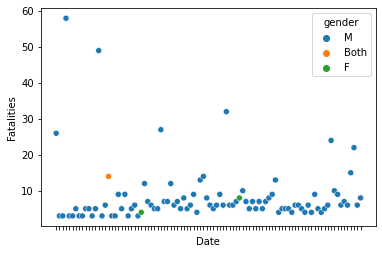

In [82]:
# CSV of US mass shootings from 1982 to 2017
shootings = pd.read_csv("us_shootings_1982-2017.csv")

shootings.columns = shootings.columns.str.strip().str.lower().str.replace(' ', '_')

def num_only(val):
    # print(val)
    return re.findall(r'[0-9]+', val)[0]

def clean_gender(val):
    if val == 'M':
        return 'M'
    elif val == "Female":
        return 'F'
    elif val == 'Male':
        return 'M'
    elif val == 'Male & Female':
        return 'Both'

shootings["fatalities"] = pd.to_numeric(shootings["fatalities"].apply(num_only))
shootings["injured"] = pd.to_numeric(shootings["injured"].apply(num_only))
shootings["race"] = shootings["race"].str.strip().str.lower()
shootings["gender"] = shootings["gender"].apply(clean_gender)

plot = sns.scatterplot(data=shootings, x="date", y="fatalities", hue="gender")
plot.set(xticklabels=[])
plot.set_xlabel("Date")
plot.set_ylabel("Fatalities")

<h3>Data Description</h3>

<h3>Data Limitations</h3>

<h3>Exploratory Data Analysis</h3>

<h3>Questions for Reviewers</h3>

For what purpose was the dataset created?
Who created the dataset?
Who funded the creation of the dataset?
Any other comments